Pearson

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [ ]:
df_vendas = pd.read_excel('cesta.xlsx', index_col='Produto')

In [ ]:
dias = np.arange(1, 31)

Gráfico comparativo de valores originais

<Axes: ylabel='Density'>

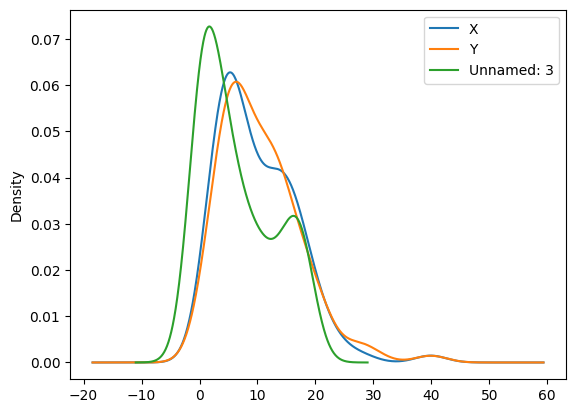

In [ ]:
df.plot.kde()

In [ ]:
correlacoes = []

for index, linha in df_vendas.iterrows():
  corr, _ = pearsonr(dias, linha.values)
  correlacoes.append(corr)

In [ ]:
df_vendas['Correlação_Pearson'] = correlacoes

In [ ]:
top_15_pearson = df_vendas.sort_values('Correlação_Pearson', ascending=False).head(15)

In [ ]:
print("Top 15 produtos com maior correlação de crescimento nas vendas: \n")
print(top_15_pearson[['Correlação_Pearson']])

Top 15 produtos com maior correlação de crescimento nas vendas: 

                                        Correlação_Pearson
Produto                                                   
Papel Higiênico F. Dupla (30 m c/4un.)            0.353684
Açúcar Refinado (5 kg)                            0.324126
Água Sanitária (1 L)                              0.242962
Desodorante Masc. Aerosol (150 ml)                0.194590
Presunto Cozido (300-400g)                        0.189695
Achocolatado (370g/400 g)                         0.159251
Banana Caturra (1 kg)                             0.116343
Maçã Nacional (1 kg)                              0.112710
Laranja Pera (1 kg)                               0.087495
Sal (1 kg)                                        0.084712
Xampu (300 ml ou mais)                            0.080890
Creme Dental (90 g)                               0.065243
Queijo Mussarela (300-400g)                       0.062230
Farinha de Mandioca Tipo 1 (1 kg)                

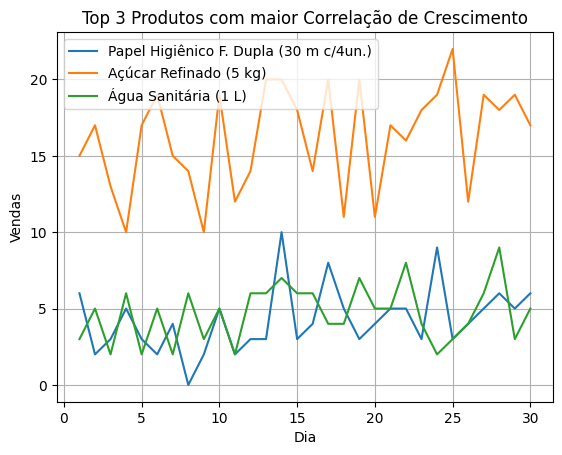

In [ ]:
for produto in top_15_pearson.index[:3]:
  plt.plot(range(1, 31), df_vendas.loc[produto][:30], label=produto)

plt.title("Top 3 Produtos com maior Correlação de Crescimento")
plt.xlabel("Dia")
plt.ylabel("Vendas")
plt.legend()
plt.grid(True)
plt.show()

# **Regressão**







In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [ ]:
df_vendas = pd.read_excel('cesta.xlsx', index_col='Produto')

In [ ]:
if df_vendas.shape[1] < 30:
   raise ValueError('Esperando 30 colunas de vendas diárias (Dia_1 a Dia_30). Verificando o arquivo')

In [ ]:
dias = np.arange(1, 31).reshape(-1, 1)

In [ ]:
tendencias = []

for index, linha in df_vendas.iterrows():
    modelo = LinearRegression()
    modelo.fit(dias, linha.values.reshape(-1,1))
    coef = modelo.coef_[0][0]
    tendencias.append(coef)

In [ ]:
df_vendas['Tendência'] = tendencias

In [ ]:
top_15 = df_vendas.sort_values('Tendência', ascending=False).head(15)

In [ ]:
print('Top 15 produtos com maior crescimento de vendas:\n')
print(top_15[['Tendência']])

Top 15 produtos com maior crescimento de vendas:

                                        Tendência
Produto                                          
Açúcar Refinado (5 kg)                   0.125473
Presunto Cozido (300-400g)               0.087653
Papel Higiênico F. Dupla (30 m c/4un.)   0.086318
Desodorante Masc. Aerosol (150 ml)       0.081201
Achocolatado (370g/400 g)                0.062291
Água Sanitária (1 L)                     0.051835
Maçã Nacional (1 kg)                     0.035373
Creme Dental (90 g)                      0.032036
Sal (1 kg)                               0.031368
Xampu (300 ml ou mais)                   0.026696
Laranja Pera (1 kg)                      0.019132
Banana Caturra (1 kg)                    0.016908
Farinha de Mandioca Tipo 1 (1 kg)        0.016018
Batata Lavada (1 kg)                     0.013571
Queijo Mussarela (300-400g)              0.010901


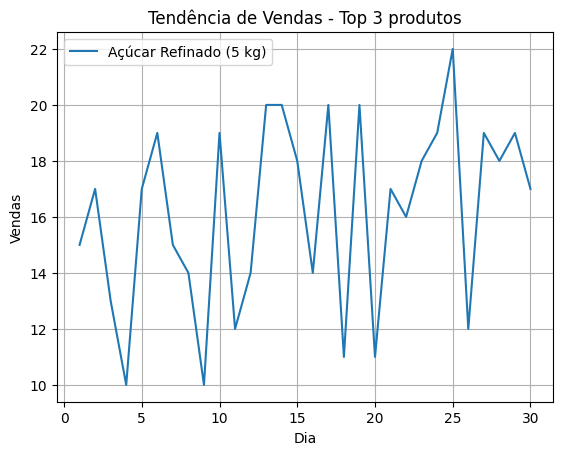

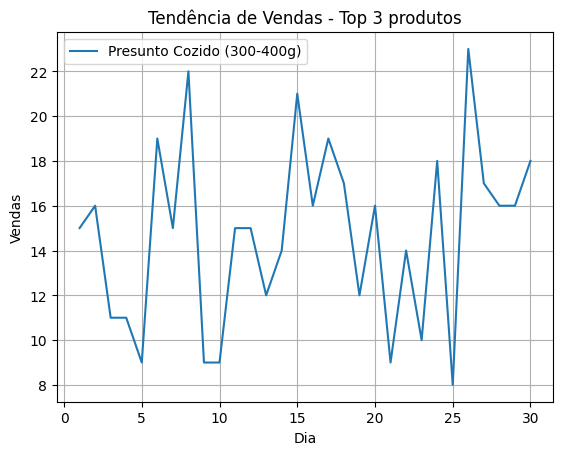

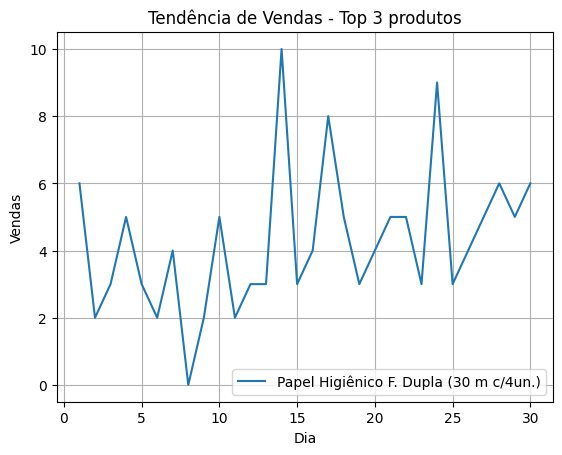

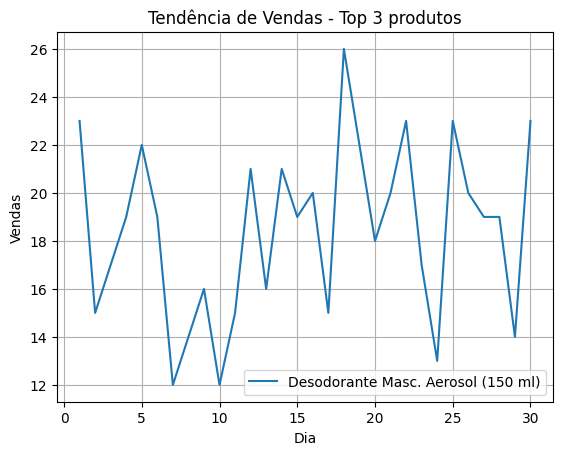

In [ ]:
for produto in top_15.index[:4]:
  plt.plot(range(1, 31), df_vendas.loc[produto][:30], label=produto)

  plt.title('Tendência de Vendas - Top 3 produtos')
  plt.xlabel('Dia')
  plt.ylabel('Vendas')
  plt.legend()
  plt.grid(True)
  plt.show()